# Stochastic matching on simple graphs

This is the notebook associated with the paper [*Stochastic dynamic matching: A mixed graph-theory and linear-algebra approach*](https://hal.archives-ouvertes.fr/hal-03502084).

Its goal is to demonstrate how the results from the paper above can be obtained using the [stochasting_matching](https://balouf.github.io/stochastic_matching/index.html) package.

It contains in particular the production of all simulation-based results from the paper.

Note that the notebook is NOT intended to be self-contained. Please refer to the paper for context and explanations.

In [1]:
import stochastic_matching as sm
from stochastic_matching.display import VIS_OPTIONS
VIS_OPTIONS['height'] = 300
VIS_OPTIONS['interaction']['navigationButtons'] = False
import numpy as np

The default simulation corresponds to $10^{digits}$ arrivals.

- Values below $6$ should only be used for debugging.
- Use $10$ for high quality results.

Parallelization is used. You can cap the number of // jobs.

In [2]:
digits = 10
T = 10**digits
max_jobs = 32

## Basis of the kernel

This section of the notebook reproduces figures from *Basis of the kernel of the incidence matrix* parts.

### Vector of the kernel space for the diamond graph.

In [3]:
diamond = sm.CycleChain(names = [str(i) for i in range(1, 5)])
diamond.show_kernel(disp_rates=False)

### Vector of the kernel space for a kayak paddle.

In [4]:
kayak = sm.KayakPaddle(3, 2, 5, names = [str(i) for i in range(1, 10)])
kayak.show_kernel(disp_rates=False)

### Two possible constructions of a kernel basis for the triamond graph

In [5]:
triamond = sm.CycleChain(c=3, names = ["1", "5", "2", "4", "3"])
triamond.show_graph()

In [6]:
triamond.seeds = [1, 3]
triamond.show_kernel(disp_rates=False)

In [7]:
triamond.seeds = [2, 4]
triamond.show_kernel(disp_rates=False)

### Two possible constructions of a kernel basis for the codomino graph

In [8]:
codomino = sm.Codomino(names=["1", "6", "2", "3", "5", "4"])
codomino.show_graph()

In [9]:
codomino.seeds = [1, 4]
codomino.show_kernel(disp_rates=False)

In [10]:
codomino.seeds = [0, 2]
codomino.show_kernel(disp_rates=False)

## Bijective vertices and facets of the convex polytope

This section of the notebook reproduces examples of polytopes.

### Essential matching, simple polytope

In [11]:
# Generic solution

codomino = sm.Codomino(names=["1", "6", "2", "3", "5", "4"], rates=[4, 5, 5, 3, 3, 2])
codomino.base_flow = codomino.maximin
codomino.seeds = [0, 2]
codomino.show_kernel(disp_rates=False, disp_flow=True)

In [12]:
# Vertices
codomino.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([1., 3., 1., 3., 1., 0., 2., 0.]),
  'null_edges': [5, 7],
  'bijective': True},
 {'kernel_coordinates': array([-1.,  0.]),
  'edge_coordinates': array([1., 3., 2., 2., 0., 1., 2., 0.]),
  'null_edges': [4, 7],
  'bijective': True},
 {'kernel_coordinates': array([0., 1.]),
  'edge_coordinates': array([2., 2., 3., 0., 0., 2., 1., 1.]),
  'null_edges': [3, 4],
  'bijective': True},
 {'kernel_coordinates': array([ 1., -1.]),
  'edge_coordinates': array([3., 1., 1., 1., 3., 0., 0., 2.]),
  'null_edges': [5, 6],
  'bijective': True},
 {'kernel_coordinates': array([1., 0.]),
  'edge_coordinates': array([3., 1., 2., 0., 2., 1., 0., 2.]),
  'null_edges': [3, 6],
  'bijective': True}]

In [13]:
for i in range(5):
    codomino.show_vertex(i, disp_rates=False, vis_options={'height': 150})

### Non-Essential matching, simple polytope

In [14]:
# Generic solution
codomino.rates = [2, 2, 4, 4, 2, 2]
codomino.base_flow = codomino.kernel_to_edge([1/3, 0])
codomino.show_kernel(disp_rates=False, disp_flow=True)

In [15]:
# Vertices
codomino.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([0., 2., 0., 2., 2., 0., 2., 0.]),
  'null_edges': [0, 2, 5, 7],
  'bijective': False},
 {'kernel_coordinates': array([-1.,  1.]),
  'edge_coordinates': array([0., 2., 2., 0., 0., 2., 2., 0.]),
  'null_edges': [0, 3, 4, 7],
  'bijective': False},
 {'kernel_coordinates': array([ 1., -1.]),
  'edge_coordinates': array([2., 0., 0., 0., 4., 0., 0., 2.]),
  'null_edges': [1, 2, 3, 5, 6],
  'bijective': False}]

In [16]:
for i in range(3):
    codomino.show_vertex(i, disp_rates=False, vis_options={'height': 150})

### Non-simple polytope

In [17]:
pyramid = sm.Pyramid(rates = [4, 3, 3, 3, 6, 6, 3, 4, 4, 4],
                     names = ["9", "2", "1", "8", "7", "3", "4", "5", "6", "10"])
pyramid.seeds = [0, 12, 2]
pyramid.base_flow = pyramid.kernel_to_edge([1/6, 1/6, 1/6])
pyramid.show_kernel(disp_flow=True, disp_rates = False, vis_options={'height': 450})

In [18]:
pyramid.vertices

[{'kernel_coordinates': array([-1.,  1.,  0.]),
  'edge_coordinates': array([1., 3., 0., 2., 0., 3., 3., 0., 1., 2., 1., 1., 3.]),
  'null_edges': [2, 4, 7],
  'bijective': True},
 {'kernel_coordinates': array([-1., -1.,  0.]),
  'edge_coordinates': array([1., 3., 0., 2., 0., 3., 1., 2., 3., 0., 1., 3., 1.]),
  'null_edges': [2, 4, 9],
  'bijective': True},
 {'kernel_coordinates': array([0., 0., 1.]),
  'edge_coordinates': array([2., 2., 1., 0., 0., 3., 3., 0., 3., 0., 2., 2., 2.]),
  'null_edges': [3, 4, 7, 9],
  'bijective': False},
 {'kernel_coordinates': array([ 1., -1.,  0.]),
  'edge_coordinates': array([3., 1., 0., 0., 2., 1., 3., 2., 3., 0., 1., 3., 1.]),
  'null_edges': [2, 3, 9],
  'bijective': True},
 {'kernel_coordinates': array([1., 1., 0.]),
  'edge_coordinates': array([3., 1., 0., 0., 2., 1., 5., 0., 1., 2., 1., 1., 3.]),
  'null_edges': [2, 3, 7],
  'bijective': True}]

In [19]:
for i in range(5):
    pyramid.show_vertex(i, disp_rates=False, vis_options={'height': 250})

## Greedy policies

This section of the notebook builds the figures from *Matching rates in surjective-only graphs: greedy policies*.

### Complete graph

In [20]:
# Note: the kernel is reversed compared to the figure in the paper; this does not change anything but signes in practice

complete = sm.Complete(n=4, names=[str(i) for i in range(1, 5)])
complete.show_kernel(disp_rates=False)

In [21]:
complete.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([0., 0., 3., 3., 0., 0.]),
  'null_edges': [0, 1, 4, 5],
  'bijective': False},
 {'kernel_coordinates': array([-1.,  2.]),
  'edge_coordinates': array([3., 0., 0., 0., 0., 3.]),
  'null_edges': [1, 2, 3, 4],
  'bijective': False},
 {'kernel_coordinates': array([ 2., -1.]),
  'edge_coordinates': array([0., 3., 0., 0., 3., 0.]),
  'null_edges': [0, 2, 3, 5],
  'bijective': False}]

For heavy computational stuff, we use the following approach:
- Simulations are run on parallel.
- Results of interest are saved in a pickle file.
- If the pickle file exists, it bypasses the computation.

In [22]:
from joblib import Parallel, delayed

def process(sim_dict, T):
    complete = sm.Complete(n=4)
    complete.run(**sim_dict, number_events=T)
    return complete.edge_to_kernel(complete.simulation)

In [23]:
sims = [{'simulator': 'longest_queue'},
        {'simulator': 'fcfm'},
        {'simulator': 'random_node'},
        {'simulator': 'random_item'},
        {'simulator': 'priority', 'weights': [1, 10, 0, -1, 3, 4]},
       ]

In [24]:
import dill as pickle
from pathlib import Path
def cached_computation(name, computation):
    file = Path(f"{name}_{digits}.pkl")
    if file.exists():
        with open(file, 'rb') as f:
            return pickle.load(f)
    else:
        results = computation()
        with open(file, 'wb') as f:
            pickle.dump(results, f)
        return results

In [25]:
def parallel_compute(process, elements):
    def computation():
        return Parallel(n_jobs=min(max_jobs, len(elements)))(delayed(process)(e, T=T) for e in elements)
    return computation

No matter what policy is used, the results is always the same in a complete graph, as all greedy policies are equivalent.

In [26]:
results = cached_computation('complete', parallel_compute(process, sims))
results

[array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.]),
 array([0., 0.])]

### Diamond graph

In [27]:
def process(beta, T):
    diamond = sm.CycleChain(names=[str(i) for i in range(1, 5)], rates=[1/4, 1/4+beta, 1/4+beta, 1/4])
    diamond.run('priority', weights=[1, 0, 0, 0, 1], number_events=T)
    flow = diamond.simulation
    return (flow[0]+flow[-1]-flow[1]-flow[3])/4

In [28]:
n_points = 30
β_vect = 10**np.linspace(-3, 1, n_points)
results = cached_computation('diamond', parallel_compute(process, β_vect))

In [29]:
from matplotlib import pyplot as plt

def min_flow2(beta):
    q13=1/(4*beta)
    q2=1/2+2*beta
    p0 = 1/(1+q13+2*q2)
    return p0*q2/4 + p0/(1+8*beta)*(1/4+beta)-1/8

lbi = [min_flow2(β) for β in β_vect]
ubi = [-min_flow2(β) for β in β_vect]

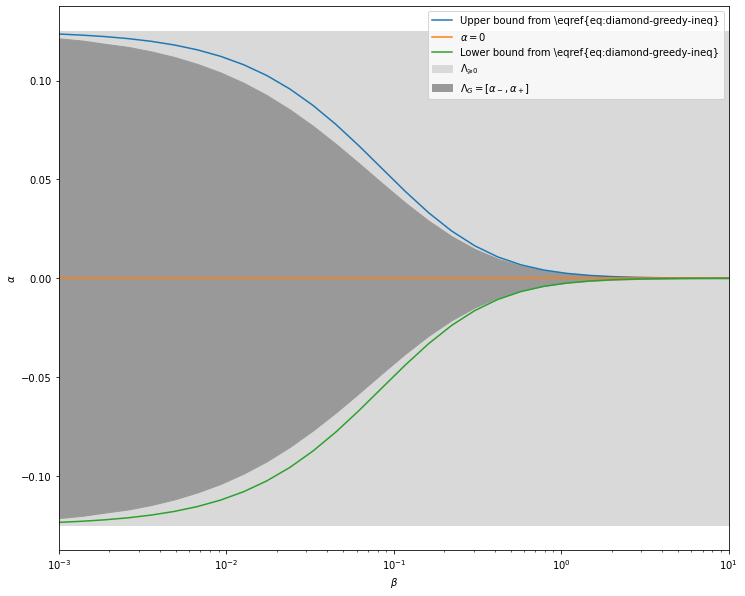

In [30]:
import tikzplotlib

plt.figure(figsize=[12, 10])
res = np.array(results)
plt.fill_between(β_vect, -1/8*np.ones(n_points), 1/8*np.ones(n_points), label = '$\Lambda_{\geqslant 0}$', color = [.85, .85, .85, 1])
plt.fill_between(β_vect, -res, res, label = '$\Lambda_G = [\\alpha_-, \\alpha_+]$', color = [.6, .6, .6, 1])

plt.semilogx(β_vect, ubi, label='Upper bound from \eqref{eq:diamond-greedy-ineq}')
plt.semilogx(β_vect, np.zeros(n_points), label='$\\alpha=0$')
plt.semilogx(β_vect, lbi, label='Lower bound from \eqref{eq:diamond-greedy-ineq}')

plt.xlabel('$\\beta$')
plt.ylabel('$\\alpha$')
plt.legend()
plt.xlim([β_vect[0], β_vect[-1]])
tikzplotlib.save(f"diamond_{digits}.tex", axis_width="12cm", axis_height="8cm",
)
plt.show()

### Fish graph

In [31]:
fish = sm.KayakPaddle(3, 0, 4, names=[str(i) for i in range(1, 7)],
                      rates=[4, 4, 3, 2, 3, 2])
fish.base_flow = fish.optimize_edge(3, -1)
fish.show_kernel(disp_rates=False, disp_flow=True)

#### Limitation lemma

In [32]:
paw = sm.Tadpole(names = [str(i) for i in range(1, 5)], rates=[4, 4, 3, 1])
paw.stabilizable

True

In [33]:
paw.base_flow

array([3., 1., 1., 1.])

In [34]:
paw.run('priority', weights=[0, 1, 1, 0], max_queue=10**7, number_events=10**7)

True

In [35]:
paw.show_flow(disp_rates=False)

Theory predict a matching rate $9/11$ for node 4.

In [36]:
9/11

0.8181818181818182

#### Unstable policy lemma

In [37]:
fish.run('priority', weights=[0, 3, 3, 2, 0, 0, 2], max_queue=10**7, number_events=10**7)
fish.show_flow(disp_rates=False)

Queues 3 and 5 are empty because 4 is transient and never empty.

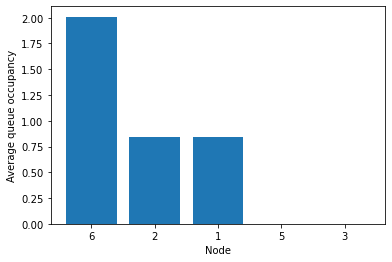

In [38]:
fig = fish.simulator.show_average_queues(sort=True, indices=[0, 1, 2, 4, 5])

For finite simulations, *transient* means *very big queue*.

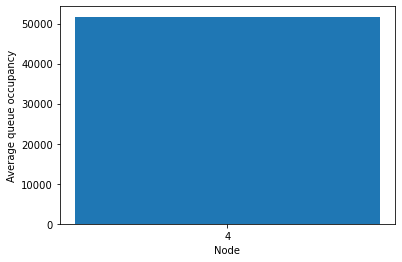

In [39]:
fig = fish.simulator.show_average_queues(sort=True, indices=[3])

#### Threshold-controlled priorities

In [40]:
fish.run('priority', weights=[0, 3, 3, 2, 0, 0, 2], threshold=100, counterweights=[0, 1, 1, 2, 0, 0, 2],
         number_events=10**7)

True

In [41]:
fish.show_flow(disp_rates=False)

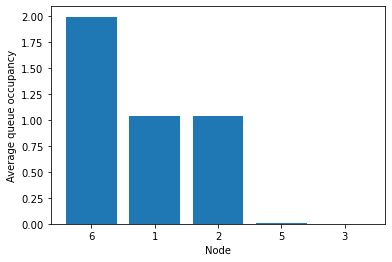

In [42]:
fig = fish.simulator.show_average_queues(sort=True, indices=[0, 1, 2, 4, 5])

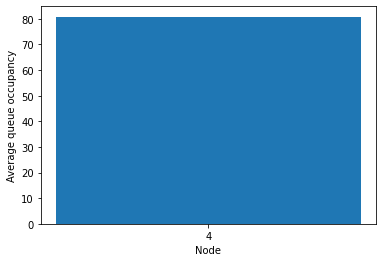

In [43]:
fig = fish.simulator.show_average_queues(sort=True, indices=[3])

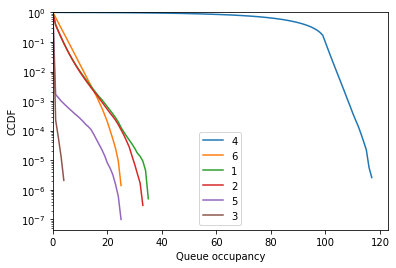

In [44]:
fig = fish.simulator.show_ccdf(sort=True)

The default priority policy implemented in the package is conditioned on the max queue size, while the policy described on the paper is conditioned on the queue size of one specific node. We can craft a new selector for the experiment.

In [45]:
from numba import njit
from stochastic_matching.simulator.size_based import Selector, QueueSizeSimulator

def process(k, T):   
    @njit
    def fish_with_weights_and_threshold(choices, queue_size, weights,
                                            threshold, counterweights, pivot):
        if queue_size[pivot] >= threshold:
            i = np.argmax(np.array([counterweights[e] for (e, j) in choices]))
        else:
            i = np.argmax(np.array([weights[e] for (e, j) in choices]))
        return choices[i]


    class FishSelector(Selector):
        name = 'fish'
        def __init__(self, model, weights, threshold, counterweights, pivot):
            weights = np.array(weights)
            self.weights = weights
            self.threshold = threshold
            counterweights = np.array(counterweights)
            self.counterweights = counterweights
            self.pivot = pivot
            super(FishSelector, self).__init__(model)


        def yield_jit(self):
            weights = self.weights.copy()
            counterweights = self.counterweights.copy()
            threshold = self.threshold
            pivot = self.pivot

            def weighted_choice(choices, queue_size):
                return fish_with_weights_and_threshold(choices, queue_size,
                                                           weights, threshold, counterweights, pivot)
            return njit(weighted_choice)

    
    fish = sm.KayakPaddle(3, 0, 4, names=[str(i) for i in range(1, 7)],
                      rates=[4, 4, 3, 2, 3, 2])
    selector_kwargs = {'weights': [0, 3, 3, 2, 0, 0, 2], 'threshold':k,
                       'counterweights': [0, 1, 1, 2, 0, 0, 2], 'pivot': 3}
    fish.run('generic_queue_size', selector='fish', selector_kwargs=selector_kwargs, number_events=T, seed=42)
    flow = fish.simulation
    p = flow[3]
    selector_kwargs = {'weights': [0, 3, 3, 0, 2, 2, 0], 'threshold':k,
                       'counterweights': [0, 1, 1, 0, 2, 2, 0], 'pivot': 5}
    fish.run('generic_queue_size', selector='fish', selector_kwargs=selector_kwargs, number_events=T, seed=42)
    flow = fish.simulation
    m = flow[3]
    return m, p    

In [46]:
k_vect = 2**(np.arange(10))
results = cached_computation('fish', parallel_compute(process, k_vect))

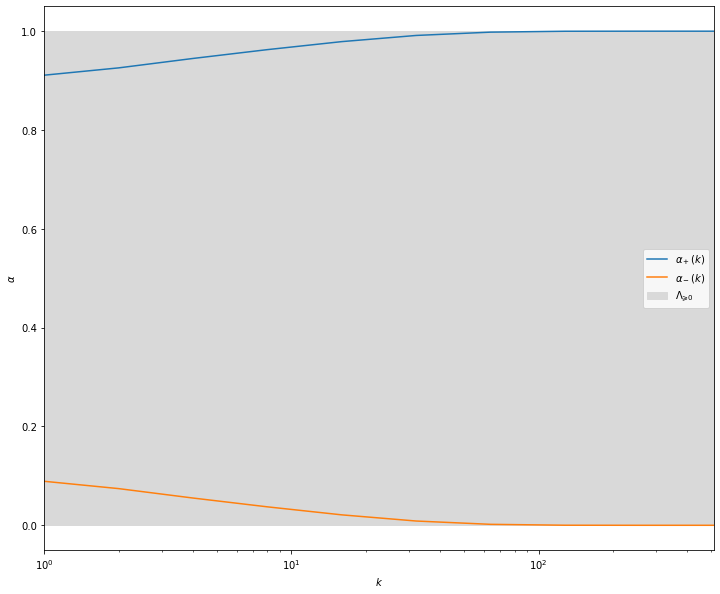

In [47]:
plt.figure(figsize=[12, 10])
n_points = len(k_vect)
alm = [e[0] for e in results]
alp = [e[1] for e in results]

plt.fill_between(k_vect, np.zeros(n_points), np.ones(n_points), label = '$\Lambda_{\geqslant 0}$', color = [.85, .85, .85, 1])
plt.semilogx(k_vect, alp, label = '$\\alpha_+(k)$')
plt.semilogx(k_vect, alm, label = '$\\alpha_-(k)$')

plt.xlabel('$k$')
plt.ylabel('$\\alpha$')
plt.legend()
plt.xlim([k_vect[0], k_vect[-1]])
tikzplotlib.save(f"fish_semilog_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()

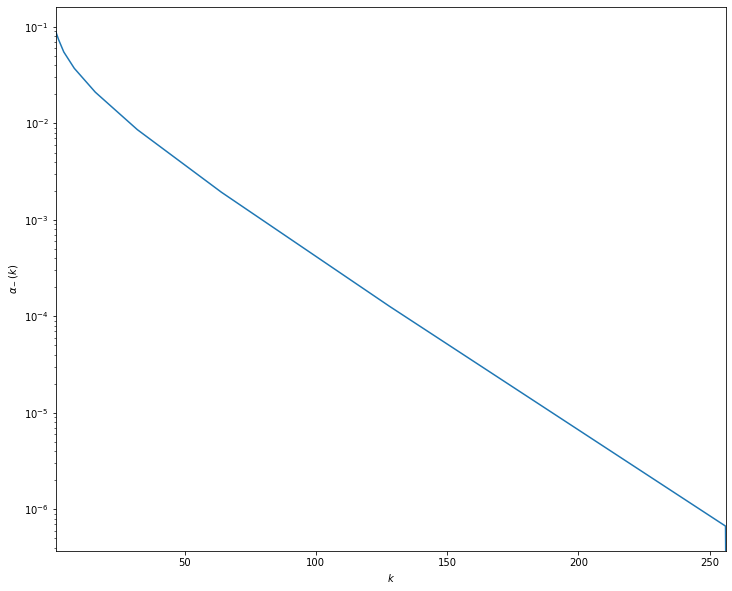

In [48]:
plt.figure(figsize=[12, 10])
n_points = len(k_vect)
plt.semilogy(k_vect, alm)
plt.xlabel('$k$')
plt.ylabel('$\\alpha_-(k)$')
plt.xlim([k_vect[0], 256])
tikzplotlib.save(f"fish_loglog_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()

## Semi-filtering policies on an injective-only vertex

In [49]:
codomino = sm.Codomino(rates=[2, 4, 2, 2, 4, 2], names=["1", "6", "2", "3", "5", "4"])
codomino.base_flow = np.array([1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0])
codomino.vertices

[{'kernel_coordinates': array([-1., -1.]),
  'edge_coordinates': array([0., 2., 0., 4., 0., 0., 2., 0.]),
  'null_edges': [0, 2, 4, 5, 7],
  'bijective': False},
 {'kernel_coordinates': array([-1.,  1.]),
  'edge_coordinates': array([2., 0., 0., 2., 2., 0., 0., 2.]),
  'null_edges': [1, 2, 5, 6],
  'bijective': False},
 {'kernel_coordinates': array([1., 1.]),
  'edge_coordinates': array([2., 0., 2., 0., 0., 2., 0., 2.]),
  'null_edges': [1, 3, 4, 6],
  'bijective': False}]

In [50]:
codomino.show_vertex(0, disp_rates=False)

In [51]:
def process(k, T):
    codomino = sm.Codomino(rates=[2, 4, 2, 2, 4, 2])
    codomino.base_flow = np.array([1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0])
    codomino.run('filtering', forbidden_edges=codomino.vertices[0]['null_edges'], threshold=k, number_events=T, max_queue=(k+200))
    return {'k': k, 
            'ccdf': codomino.simulator.compute_ccdf()[0, :], 
            'leak': np.sum(codomino.simulation[codomino.vertices[0]['null_edges']])}

In [52]:
k_vect = 16*4**np.arange(6)
results = cached_computation('codomino', parallel_compute(process, k_vect))

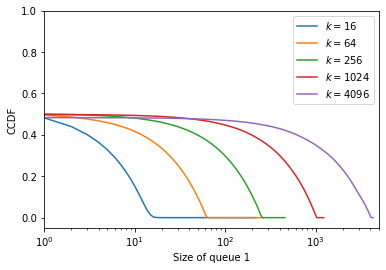

In [53]:
for r in results[:-1]:
    plt.semilogx(r['ccdf'], label=f"$k={r['k']}$")
plt.legend(loc=1)
plt.ylim([None, 1])
plt.xlim([1, 5000])
plt.xlabel("Size of queue 1")
plt.ylabel("CCDF")
tikzplotlib.save(f"codomino_semilog_{digits}.tex", axis_width="4.5cm", axis_height="4cm")
plt.show()

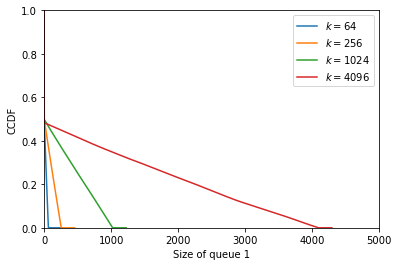

In [54]:
for r in results[1:-1]:
    plt.plot(r['ccdf'], label=f"$k={r['k']}$")
plt.legend()
plt.ylim([0, 1])
plt.xlim([0, 5000])
plt.xlabel("Size of queue 1")
plt.ylabel("CCDF")
tikzplotlib.clean_figure()
tikzplotlib.save(f"codomino_linear_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()

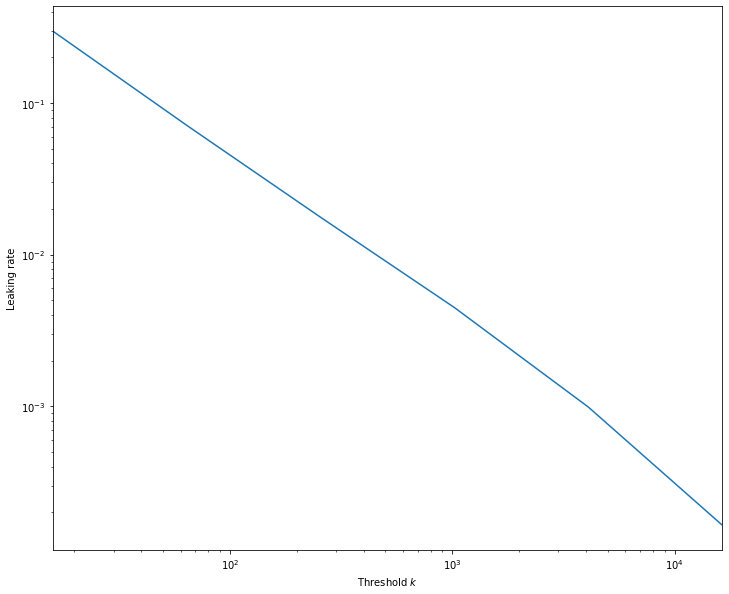

In [55]:
plt.figure(figsize=[12, 10])
leaks = [r['leak'] for r in results]
plt.loglog(k_vect, leaks)
plt.xlabel('Threshold $k$')
plt.ylabel('Leaking rate')
plt.xlim([k_vect[0], k_vect[-1]])
tikzplotlib.save(f"codomino_loglog_{digits}.tex", axis_width="6.5cm", axis_height="6cm")
plt.show()